In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define dataset path
ROOT_DIR = "/Users/uv/Desktop/chest_xray"
TRAIN_DIR = os.path.join(ROOT_DIR, "train")
TEST_DIR = os.path.join(ROOT_DIR, "test")

# Parameters
IMG_SIZE = 224  # Resize images to 224x224 for standard input to CNN

# Function to load images and labels
def load_data(data_dir):
    images, labels = [], []
    categories = ["NORMAL", "PNEUMONIA"]
    for label, category in enumerate(categories):  # Assign labels: NORMAL=0, PNEUMONIA=1
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                # Load image
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load image in color mode
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image to IMG_SIZE x IMG_SIZE
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load training and testing data
X_train, y_train = load_data(TRAIN_DIR)
X_test, y_test = load_data(TEST_DIR)

# Verify dataset shape
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training data shape: (5216, 224, 224, 3), Training labels shape: (5216,)
Testing data shape: (624, 224, 224, 3), Testing labels shape: (624,)


In [3]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Train shape: (4172, 224, 224, 3), Validation shape: (1044, 224, 224, 3), Test shape: (624, 224, 224, 3)


In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define CNN model
def build_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')  # 2 classes: NORMAL and PNEUMONIA
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the CNN model
cnn_model = build_cnn((224, 224, 3))

# Train the model
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32
)


/Users/uv/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 96s 733ms/step - accuracy: 0.7937 - loss: 0.5697 - val_accuracy: 0.9406 - val_loss: 0.1772
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 97s 742ms/step - accuracy: 0.9400 - loss: 0.1583 - val_accuracy: 0.9703 - val_loss: 0.0894
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 99s 756ms/step - accuracy: 0.9626 - loss: 0.1047 - val_accuracy: 0.9617 - val_loss: 0.1173
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 92s 705ms/step - accuracy: 0.9750 - loss: 0.0834 - val_accuracy: 0.9751 - val_loss: 0.0796
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 98s 751ms/step - accuracy: 0.9768 - loss: 0.0604 - val_accuracy: 0.9464 - val_loss: 0.1483
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 95s 726ms/step - accuracy: 0.9685 - loss: 0.0840 - val_accuracy: 0.9789 - val_loss: 0.0594
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 93s 708ms/step - accuracy: 0.9844 - loss: 0.0434 - val_accuracy: 0.9770 - val_loss: 0.0816
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 93s 712ms/step - accuracy: 0.9836 - loss: 0

In [6]:
# Evaluate model on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.5023 - loss: 6.3623
Test Accuracy: 72.92%


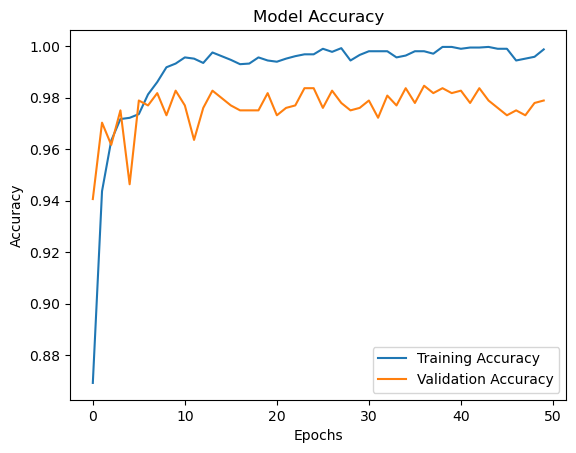

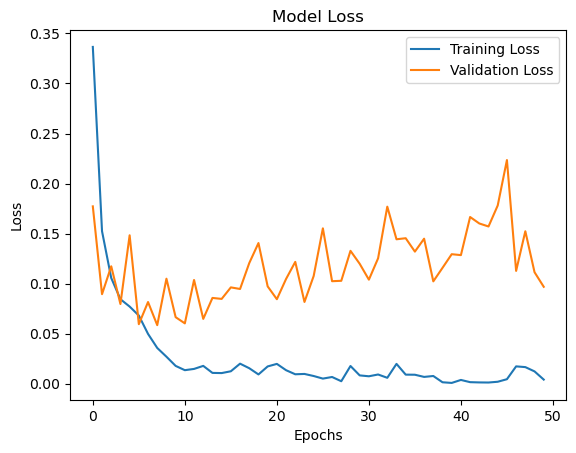

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


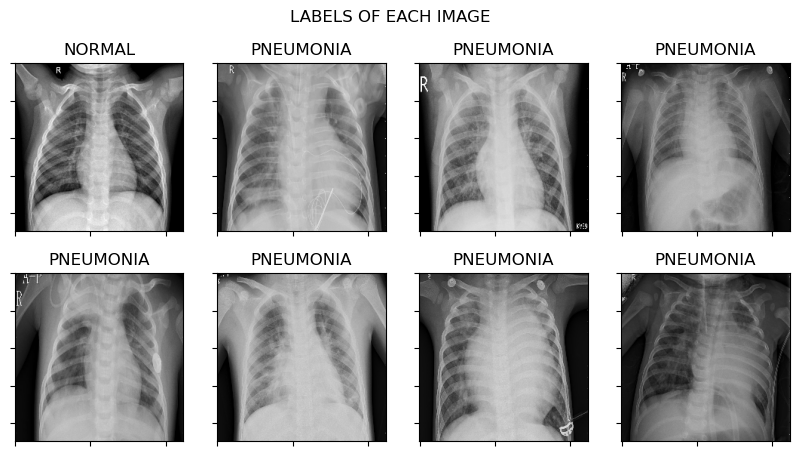

In [8]:
import random
import matplotlib.pyplot as plt
import cv2

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.suptitle('LABELS OF EACH IMAGE')

# Replace X_train_data with X_train
for (img, label), ax in zip(random.sample(list(zip(X_train, y_train)), 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(False)
    ax.set_title("NORMAL" if label == 0 else "PNEUMONIA")  # Use actual label name for clarity
    
    # Convert the image back to uint8 type before passing it to cv2.cvtColor
    img_uint8 = (img * 255).astype(np.uint8)  # Convert to uint8
    ax.imshow(cv2.cvtColor(img_uint8, cv2.COLOR_BGR2RGB))

plt.show()


In [9]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

# Assuming you have a trained model, e.g., cnn_model
# Predict on the test set
y_pred = cnn_model.predict(X_test)  # Replace cnn_model with your actual model name
y_pred = np.argmax(y_pred, axis=1)  # If the model outputs probabilities, take the class with the highest probability

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
f1 = f1_score(y_test, y_pred, average='binary')  # Similarly, use 'macro' or 'weighted' for multi-class

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")




20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step
Accuracy: 72.92%
Precision: 69.91%
F1 Score: 82.12%


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

# Flatten images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flatten each image to a 1D vector
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_flattened, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_flattened)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='binary')  # Use 'macro' for multi-class
rf_f1 = f1_score(y_test, y_pred_rf, average='binary')  # Use 'macro' for multi-class

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Random Forest Precision: {rf_precision * 100:.2f}%")
print(f"Random Forest F1 Score: {rf_f1 * 100:.2f}%")


Random Forest Accuracy: 75.48%
Random Forest Precision: 72.07%
Random Forest F1 Score: 83.50%
